### Sınıflama İçin Çok Terimli Lojistik Regresyon Uygulaması

Veri Seti: İris çiçeği veri kümesi

Veri seti üç iris türünün(Iris setosa, Iris virginica, Iris versicolor) her birinden 50 örnekten oluşur. Her numuneden dört özellik ölçülmüştür.
Taç ve çanak yapraklarının uzunluğu ve genişliği(santimetre cinsinden)

#### Problem: Bu dört özelliğin kombinasyonuna dayanarak, çok terimli lojistik regresyon modeli ile sınıflama modelleri oluşturmak

In [77]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names=["sepal_uzunlugu","sepal_genisligi","petal_uzunlugu","petal_genisligi","tur"]
dataset = read_csv(url, names=names)
dataset
df = pd.DataFrame(dataset)
df

,sepal_uzunlugu,sepal_genisligi,petal_uzunlugu,petal_genisligi,tur
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


 *Bir sonraki adım özellik mühendisliğidir. En güçlü sınıflandırma modelini sağlayacak özelliklerin seçilmesi gerekir.

Aşağıda kodlar sepal genişliğe karşı petal uzunluğun serpme grafiği verilmiş ve farklı türler farklı işaretçilerle gösterilmiştir.

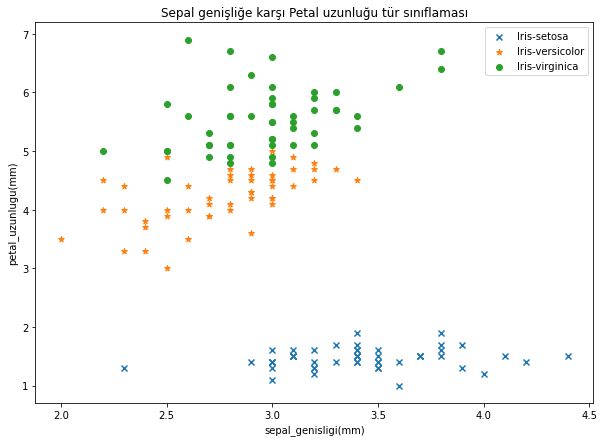

In [130]:
markers = {
    "Iris-setosa" : {"marker" : "x"},
    "Iris-versicolor" : {"marker" : "*"},
    "Iris-virginica" : {"marker" : "o"}}
plt.figure(figsize=(10,7))
for name,group in df.groupby("tur"):
    plt.scatter(group["sepal_genisligi"], group["petal_uzunlugu"],
                label = name, marker = markers[name]["marker"])
plt.title("Sepal genişliğe karşı Petal uzunluğu tür sınıflaması");
plt.xlabel("sepal_genisligi(mm)");
plt.ylabel("petal_uzunlugu(mm)");
plt.legend();

In [45]:
# Aşağıdaki kodlar kullanılarak farklı öznitelikler seçilebilir.
oznitelikler = [ "sepal_genisligi", "petal_uzunlugu"]

In [46]:
# Aşağıdaki kod ile hedef değişkeni çok terimli lojistik modele uygun olarak ifade edilebilir.
tur = [
    "Iris-setosa",     # 0
    "Iris-versicolor", # 1 
    "Iris-virginica"   # 2
]

In [47]:
output = [tur.index(spec) for spec in df.tur]

In [129]:
# Çok terimli lojistik modeli çağırmak için;    !!!!
model = LogisticRegression(multi_class = "auto", solver = "lbfgs")
model.fit(df[oznitelikler], output)

LogisticRegression()

In [114]:
# Model doğruluğu için;            !!!!
model.score(df[oznitelikler], output)

0.9733333333333334

In [52]:
oznitelikler = ["sepal_uzunlugu", "petal_genisligi"]
model.fit(df[oznitelikler], output)
model.score(df[oznitelikler], output)

0.96

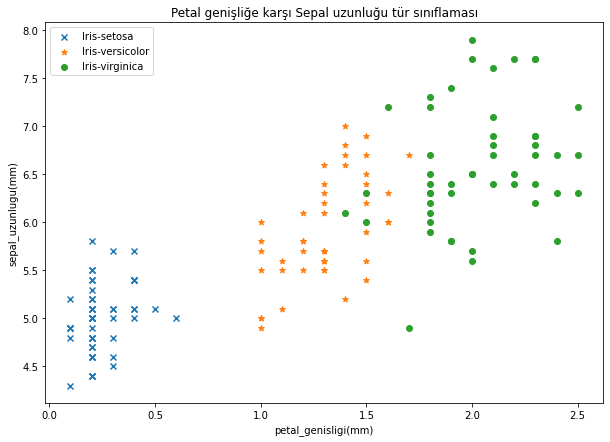

In [89]:
markers = {
    "Iris-setosa" : {"marker" : "x"},
    "Iris-versicolor" : {"marker" : "*"},
    "Iris-virginica" : {"marker" : "o"}}
plt.figure(figsize=(10,7))
for name,group in df.groupby("tur"):
    plt.scatter(group["petal_genisligi"], group["sepal_uzunlugu"],
                label = name, marker = markers[name]["marker"])
plt.title("Petal genişliğe karşı Sepal uzunluğu tür sınıflaması");
plt.xlabel("petal_genisligi(mm)");
plt.ylabel("sepal_uzunlugu(mm)");
plt.legend();

In [55]:
oznitelikler = ["sepal_uzunlugu", "sepal_genisligi"]
model.fit(df[oznitelikler], output)
model.score(df[oznitelikler], output)

0.82

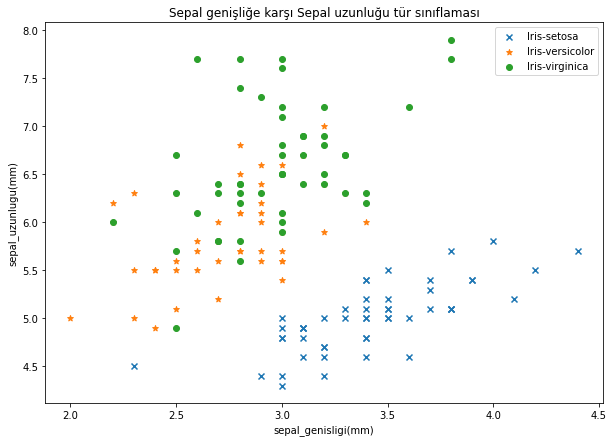

In [59]:
plt.figure(figsize=(10,7))
for name,group in df.groupby("tur"):
    plt.scatter(group["sepal_genisligi"], group["sepal_uzunlugu"],
                label = name, marker = markers[name]["marker"])
plt.title("Sepal genişliğe karşı Sepal uzunluğu tür sınıflaması");
plt.xlabel("sepal_genisligi(mm)");
plt.ylabel("sepal_uzunlugu(mm)");
plt.legend();

In [60]:
oznitelikler = ["petal_genisligi", "petal_uzunlugu"]
model.fit(df[oznitelikler], output)
model.score(df[oznitelikler], output)

0.9666666666666667

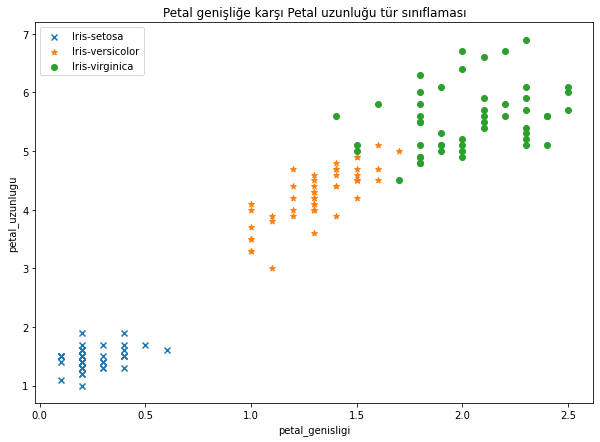

In [61]:
plt.figure(figsize=(10,7))
for name,group in df.groupby("tur"):
    plt.scatter(group["petal_genisligi"], group["petal_uzunlugu"],
                label = name, marker = markers[name]["marker"])
plt.title("Petal genişliğe karşı Petal uzunluğu tür sınıflaması");
plt.xlabel("petal_genisligi");
plt.ylabel("petal_uzunlugu");
plt.legend();

In [65]:
oznitelikler = ["sepal_genisligi", "petal_uzunlugu", "petal_genisligi"]
model.fit(df[oznitelikler], output)
model.score(df[oznitelikler], output)

0.98

In [66]:
oznitelikler = ["sepal_uzunlugu", "sepal_genisligi", "petal_uzunlugu", "petal_genisligi"]
model.fit(df[oznitelikler], output)
model.score(df[oznitelikler], output)

0.9733333333333334